<a href="https://colab.research.google.com/github/Himanshu-1703/Feature-Engineering/blob/main/Encoding/Probability_ratio_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/csv files/titanic_krish.csv'
df = pd.read_csv(path,usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
# check for missing values

df.isna().sum()

Survived      0
Cabin       687
dtype: int64

In [ ]:
df['Cabin'].isna()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

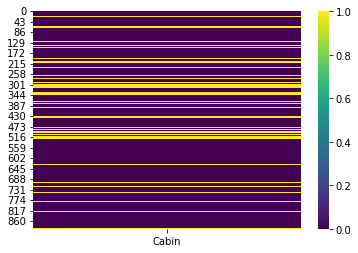

In [ ]:
# plot the missing values heatmap
import seaborn as sns

sns.heatmap(~df[['Cabin']].isna(),cmap='viridis')
plt.show()

In [ ]:
# fill the missing values

df['Cabin'].fillna('Missing',inplace=True)

In [ ]:
# unique values in the column

df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [ ]:
# get the cabin letter from the cabin number

df['Cabin'] = df['Cabin'].apply(lambda x : x[0])

In [ ]:
# survival rate depending on the cabin number

prob_cabin = df.groupby('Cabin')['Survived'].mean()
prob_cabin

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [ ]:
prob_df = pd.DataFrame(prob_cabin,columns=['Survived'])

In [ ]:
prob_df['Died'] = 1 - prob_df['Survived']

In [ ]:
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [ ]:
prob_df['Prob_ratio'] = prob_df['Survived']  / prob_df['Died']

prob_df

,Survived,Died,Prob_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [ ]:
prob_dict = prob_df['Prob_ratio'].to_dict()

In [ ]:
# map the values in the dictionary to the cabin column

df['Cabin'].replace(prob_dict,inplace=True)

### Steps:
Find the probability ratio depending on the binary target column.
1. Calculate the probability of category being 1.
2. Calculate the probability of category being 0.
3. Divide the two probabilities to get their probability ratio.
4. Replace the categorical values with numerical values of the ratio of the probabilities.